<a href="https://colab.research.google.com/github/ehpub/KFQ_DL_2023-/blob/main/2023_kfq_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%9B%88%EB%A0%A8_%EB%B0%8F_%ED%8F%89%EA%B0%80_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

In [2]:
from keras.datasets  import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train,x_val = x_train[10000:], x_train[:10000]
y_train,y_val = y_train[10000:], y_train[:10000]

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
#모델 생성
def get_mnist_model():
  inputs = keras.Input(shape=(784,))
  hidden = layers.Dense(512,activation='relu')(inputs)
  hidden2 = layers.Dropout(0.5)(hidden)
  outputs = layers.Dense(10,activation='softmax')(hidden2)
  model = keras.Model(inputs,outputs)
  return model
model = get_mnist_model()
#모델 컴파일
model.compile(optimizer='rmsprop',
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
#모델 학습
hist = model.fit(x_train,y_train,epochs=20,
                 validation_data=(x_val,y_val))
#모델 평가
test = model.evaluate(x_test,y_test)
#모델 사용
pred = model.predict(x_test)

Epoch 1/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2904 - accuracy: 0.9137 - val_loss: 0.1499 - val_accuracy: 0.9554
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1576 - accuracy: 0.9550 - val_loss: 0.1136 - val_accuracy: 0.9692
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1291 - accuracy: 0.9632 - val_loss: 0.1104 - val_accuracy: 0.9701
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1147 - accuracy: 0.9674 - val_loss: 0.1074 - val_accuracy: 0.9733
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1065 - accuracy: 0.9704 - val_loss: 0.1028 - val_accuracy: 0.9747
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0928 - accuracy: 0.9748 - val_loss: 0.1049 - val_accuracy: 0.9753
Epoch 7/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.0898 - accuracy: 0.9762 - val_loss: 0.0984 - val_ac

## 사용자 평가 지표

In [18]:
class RootMeanSquaredError(keras.metrics.Metric):
  def __init__(self,name='rmse',**kwargs):
    super().__init__(name=name,**kwargs)
    self.mse_sum = self.add_weight(name='mse_sum',initializer='zeros')
    self.total_samples = self.add_weight(
        name = 'total_samples',
        initializer = 'zeros',dtype='int32'
    )
  def update_state(self,y_true,y_pred,sample_weight=None):
    y_true = tf.one_hot(y_true,depth=tf.shape(y_pred)[1])
    mse = tf.reduce_sum(tf.square(y_true - y_pred))
    self.mse_sum.assign_add(mse)
    num_samples = tf.shape(y_pred)[0]
    self.total_samples.assign_add(num_samples)
  def result(self):
    return tf.sqrt(self.mse_sum/tf.cast(self.total_samples,tf.float32))
  def reset_state(self):
    self.mse_sum.assign(0.)
    self.total_samples.assign(0)

In [19]:
model = get_mnist_model()
#모델 컴파일
model.compile(optimizer='rmsprop',
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=[RootMeanSquaredError()])

In [20]:
#모델 학습
hist = model.fit(x_train,y_train,epochs=20,
                 validation_data=(x_val,y_val))

Epoch 1/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2936 - rmse: 7.1752 - val_loss: 0.1524 - val_rmse: 7.3642
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1563 - rmse: 7.3530 - val_loss: 0.1255 - val_rmse: 7.4066
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1269 - rmse: 7.3887 - val_loss: 0.1026 - val_rmse: 7.4200
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1142 - rmse: 7.4019 - val_loss: 0.1013 - val_rmse: 7.4309
Epoch 5/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1016 - rmse: 7.4100 - val_loss: 0.1013 - val_rmse: 7.4372
Epoch 6/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0962 - rmse: 7.4199 - val_loss: 0.0990 - val_rmse: 7.4423
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0878 - rmse: 7.4249 - val_loss: 0.0960 - val_rmse: 7.4435
Epoch 8/20
1563/1563 [===================

In [21]:
mcp = keras.callbacks.ModelCheckpoint('cp.keras',
                                      monitor='val_loss',
                                      save_best_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   patience=5)

In [22]:
model = get_mnist_model()
#모델 컴파일
model.compile(optimizer='rmsprop',
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=[RootMeanSquaredError()])
#모델 학습
hist = model.fit(x_train,y_train,epochs=20,
                 validation_data=(x_val,y_val),
                 callbacks=[mcp,es])

Epoch 1/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2902 - rmse: 7.1781 - val_loss: 0.1428 - val_rmse: 7.3613
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1586 - rmse: 7.3546 - val_loss: 0.1263 - val_rmse: 7.4001
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1291 - rmse: 7.3875 - val_loss: 0.1041 - val_rmse: 7.4234
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1126 - rmse: 7.4012 - val_loss: 0.1012 - val_rmse: 7.4280
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1014 - rmse: 7.4100 - val_loss: 0.1014 - val_rmse: 7.4368
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0967 - rmse: 7.4178 - val_loss: 0.0916 - val_rmse: 7.4399
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0863 - rmse: 7.4241 - val_loss: 0.0888 - val_rmse: 7.4464
Epoch 8/20
1563/1563 [===================

In [24]:
model = keras.models.load_model('/content/cp.keras')

In [25]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0816 - rmse: 5.2287


[0.08162909001111984, 5.2286834716796875]

## 사용자 정의 콜백

In [29]:
class DemoCallBack(keras.callbacks.Callback):
  def on_epoch_begin(self,epoch,logs):
    print('eb')
  def on_epoch_end(self,epoch,logs):
    print('ee')
  def on_batch_begin(self,batch,logs):
    print('bb')
  def on_batch_end(self,batch,logs):
    print('be')
  def on_train_begin(self,logs):
    print('tb')
  def on_train_end(self,logs):
    print('te')

In [30]:
model = get_mnist_model()
#모델 컴파일
model.compile(optimizer='rmsprop',
              loss = keras.losses.sparse_categorical_crossentropy)
hist = model.fit(x_train,y_train,epochs=20,
                 validation_data=(x_val,y_val),
                 callbacks=[DemoCallBack()])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
bb
be
bb
be
bb
be
1419/1563 [==========================>...] - ETA: 2s - loss: 0.0532bb
be
bb
be
bb
be
bb
be
1423/1563 [==========================>...] - ETA: 2s - loss: 0.0533bb
be
bb
be
bb
be
bb
be
1427/1563 [==========================>...] - ETA: 2s - loss: 0.0532bb
be
bb
be
bb
be
bb
be
1431/1563 [==========================>...] - ETA: 2s - loss: 0.0531bb
be
bb
be
bb
be
bb
be
1435/1563 [==========================>...] - ETA: 2s - loss: 0.0531bb
be
bb
be
1437/1563 [==========================>...] - ETA: 2s - loss: 0.0533bb
be
bb
be
bb
be
1440/1563 [==========================>...] - ETA: 2s - loss: 0.0534bb
be
bb
be
bb
be
1443/1563 [==========================>...] - ETA: 2s - loss: 0.0535bb
be
bb
be
1445/1563 [==========================>...] - ETA: 2s - loss: 0.0534bb
be
bb
be
bb
be
1448/1563 [==========================>...] - ETA: 2s - loss: 0.0535bb
be
bb
be
bb
be
1451/1563 [==========================>...] - ETA: 2s - loss: 0.0534bb
be
bb
be
bb
be

KeyboardInterrupt: ignored

In [31]:
import matplotlib.pyplot as plt

In [32]:
class LossHistory(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    plt.clf()
    plt.plot(range(len(self.per_batch_losses)),
             self.per_batch_losses,
             label='training loss per batch')
    plt.legend()
    plt.show()
    self.per_batch_losses=[]
  def on_batch_end(self,batch,logs):
    self.per_batch_losses.append(logs.get('loss'))
  def on_train_begin(self,logs):
    self.per_batch_losses=[]

Epoch 1/10
1560/1563 [============================>.] - ETA: 0s - loss: 0.2958

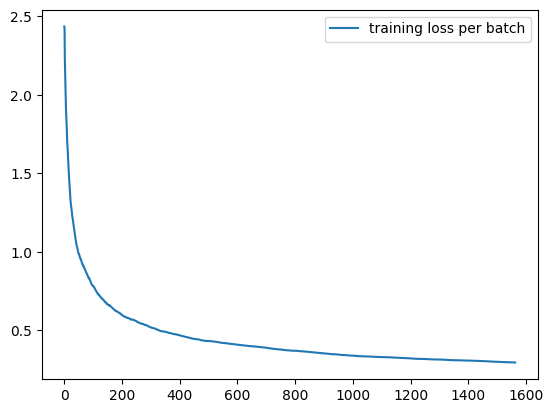

1563/1563 [==============================] - 15s 9ms/step - loss: 0.2956 - val_loss: 0.1472
Epoch 2/10
1557/1563 [============================>.] - ETA: 0s - loss: 0.1570

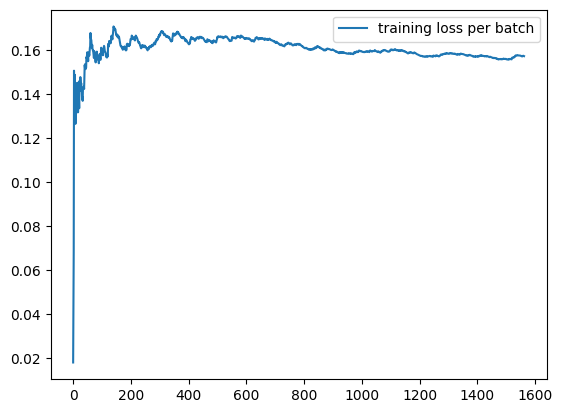

1563/1563 [==============================] - 14s 9ms/step - loss: 0.1571 - val_loss: 0.1168
Epoch 3/10
1559/1563 [============================>.] - ETA: 0s - loss: 0.1260

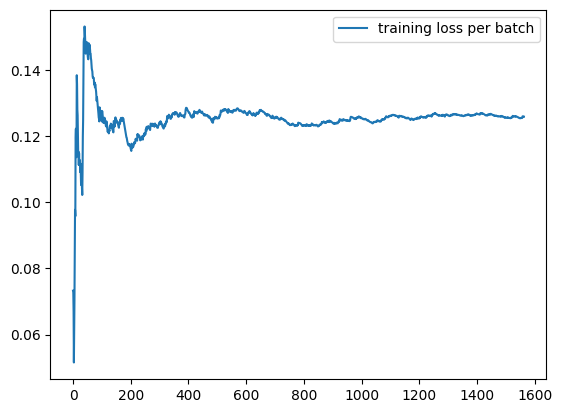

1563/1563 [==============================] - 13s 8ms/step - loss: 0.1259 - val_loss: 0.1085
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 0.1120

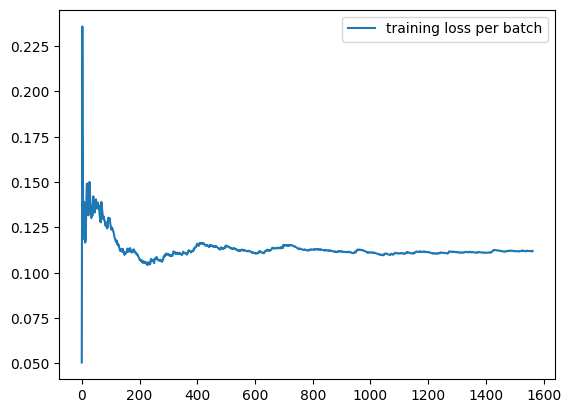

1563/1563 [==============================] - 14s 9ms/step - loss: 0.1120 - val_loss: 0.1017
Epoch 5/10
1556/1563 [============================>.] - ETA: 0s - loss: 0.1015

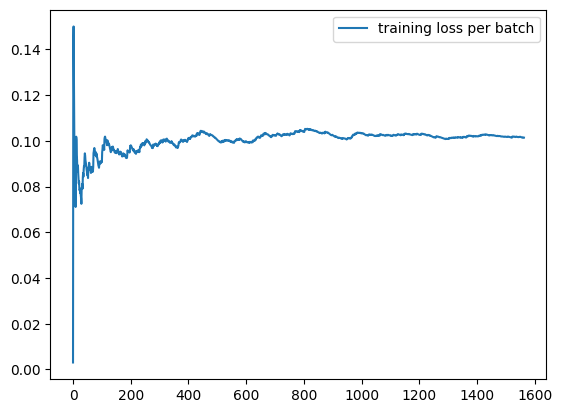

1563/1563 [==============================] - 14s 9ms/step - loss: 0.1014 - val_loss: 0.0953
Epoch 6/10
1563/1563 [==============================] - ETA: 0s - loss: 0.0939

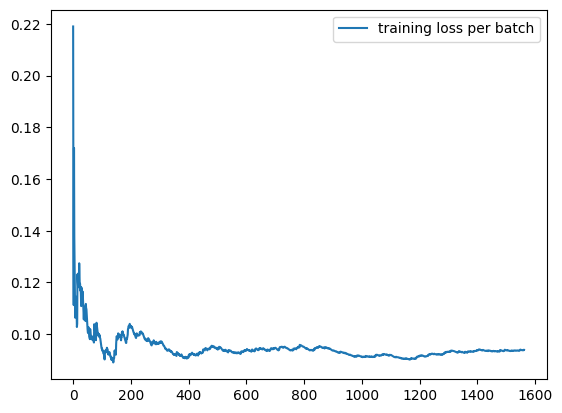

1563/1563 [==============================] - 14s 9ms/step - loss: 0.0939 - val_loss: 0.1021
Epoch 7/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.0853

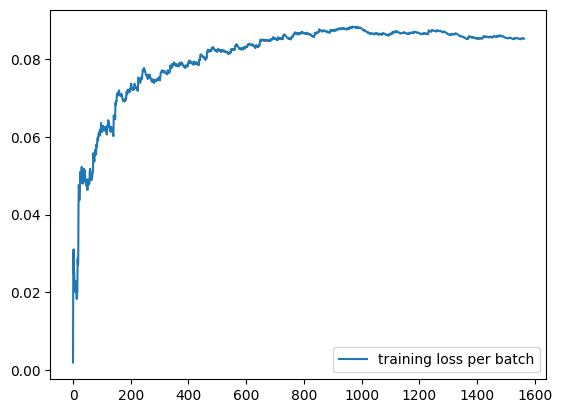

1563/1563 [==============================] - 14s 9ms/step - loss: 0.0852 - val_loss: 0.0912
Epoch 8/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.0790

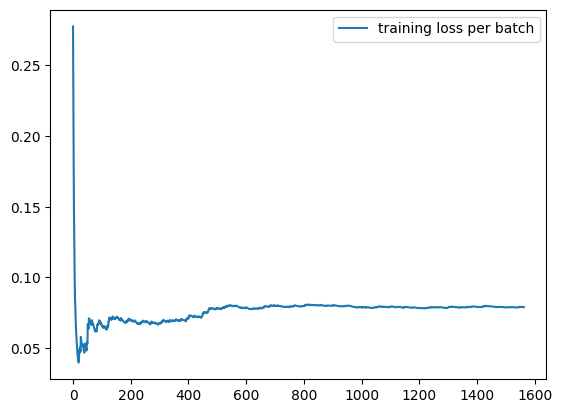

1563/1563 [==============================] - 14s 9ms/step - loss: 0.0789 - val_loss: 0.0946
Epoch 9/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.0763

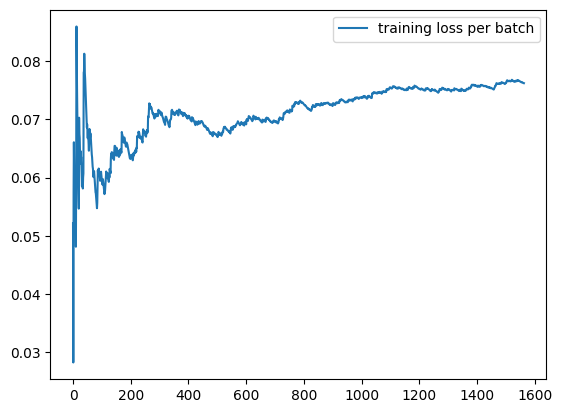

1563/1563 [==============================] - 14s 9ms/step - loss: 0.0762 - val_loss: 0.0901
Epoch 10/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.0718

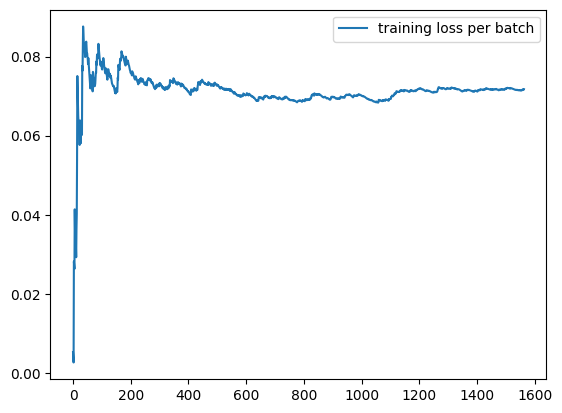

1563/1563 [==============================] - 14s 9ms/step - loss: 0.0718 - val_loss: 0.0936


In [33]:
model = get_mnist_model()
#모델 컴파일
model.compile(optimizer='rmsprop',
              loss = keras.losses.sparse_categorical_crossentropy)
hist = model.fit(x_train,y_train,epochs=10,
                 validation_data=(x_val,y_val),
                 callbacks=[LossHistory()])

In [40]:
tb = keras.callbacks.TensorBoard(log_dir='ml_dir')

In [41]:
model = get_mnist_model()
#모델 컴파일
model.compile(optimizer='rmsprop',
              loss = keras.losses.sparse_categorical_crossentropy)
hist = model.fit(x_train,y_train,epochs=5,
                 validation_data=(x_val,y_val),
                 callbacks=[tb])

Epoch 1/5
1563/1563 [==============================] - 47s 10ms/step - loss: 0.2957 - val_loss: 0.1412
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1589 - val_loss: 0.1245
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1309 - val_loss: 0.1009
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1153 - val_loss: 0.0952
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1052 - val_loss: 0.0955


In [36]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir /content/ml_dir --port 6200

## 훈련 및 추론

In [53]:
metrics = keras.metrics.SparseCategoricalAccuracy()
y_actual = [0,1,2]
pred = [[0.9,0.1,0],
        [0.45,0.44,0.11],
        [0.1,0.01,0.89]]

In [54]:
metrics.update_state(y_actual,pred)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=3.0>

In [55]:
score = metrics.result()
print(score)

tf.Tensor(0.6666667, shape=(), dtype=float32)


In [57]:
metrics = keras.metrics.MeanSquaredError()

In [60]:
y_actual = [87,95,68,104]
pred1 = [78,82,93,91]
pred2 = [80,90,75,200]

In [61]:
metrics.update_state(y_actual,pred1)
score = metrics.result()
print(score)
metrics.update_state(y_actual,pred2)
score = metrics.result()
print(score)

tf.Tensor(952.25, shape=(), dtype=float32)
tf.Tensor(1297.875, shape=(), dtype=float32)
